# Linear Model Used Car Price Predictor 
**Due: Wednesday, 09/25/2024, 2:30 PM**

Welcome to your first assignment! You will train a linear model to predict a used car's price based on its age.


Exercises:
1. $\color{violet}{\textbf{(10\%) Data Visualization}}$
2. $\color{violet}{\textbf{(10\%) Create a Linear Model}}$
3. $\color{violet}{\textbf{(10\%) Calculate Mean Square Error Loss}}$
4. $\color{violet}{\textbf{(20\%) Compute Loss Gradient}}$
5. $\color{violet}{\textbf{(40\%) Implement Gradient Descent Algorithm}}$
6. $\color{violet}{\textbf{(10\%) Test Model with New Data}}$


**Instructions:**
- Write your code only between the $\color{green}{\textbf{\small \#\#\# START CODE HERE \#\#\#}}$ and $\color{green}{\textbf{\small \#\#\# END CODE HERE \#\#\#}}$ commented lines. $\color{red}{\textbf{Do not modify code out of the designated area.}}$
- Replace `None`s with appropriate variables or operations.
- Reference answers are provided after a certain coding blocks. Be aware if your answer is different from the reference..
- Avoid using for-loops and while-loops, unless you are explicitly told to do so.

**After this assignment you will:**

- Be able to train a neural network model with the simplest form: single-in, single-out linear function.
    - Initialize weight and bias parameters.
    - Use a loss function to evaluate the model's performance.
    - Optimize the weight and bias parameters using gradient descent algorithm.
- Get more used to vectorization using NumPy.

## 1 - Load the Data ##
We need data to build a price predictor (model). The model takes in ages (feature) of the cars, then output the predicted selling prices of them. First, let's load the ages feature and the price label. Then, plot a figure to roughly observe the dataset.


dimension of raw features: 1, shape of raw features: (268577,)
dimension of raw labels: 1, shape of raw labels: (268577,)
fisrt 5 samples: (array([13.,  6.,  5.,  4.,  9.]), array([ 3500, 26000, 24971, 39990,  8495]))


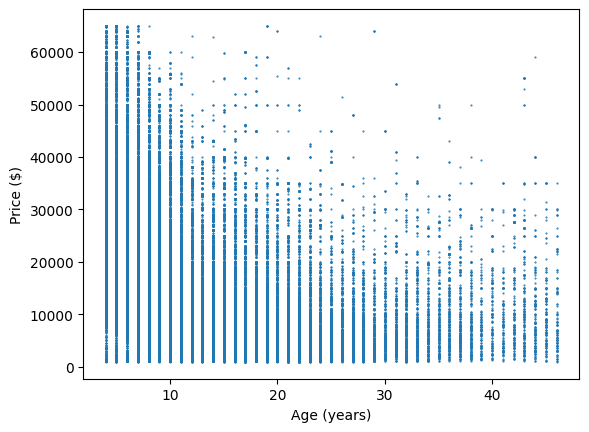

In [8]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt

# Load the data (year, price)
X_raw = np.load("ages_train.npy")
y_raw = np.load("prices_train.npy")
print(f"dimension of raw features: {X_raw.ndim}, shape of raw features: {X_raw.shape}")
print(f"dimension of raw labels: {y_raw.ndim}, shape of raw labels: {y_raw.shape}")
print(f"fisrt 5 samples: {X_raw[:5], y_raw[:5]}")

# Visualize the data
plt.xlabel("Age (years)")
plt.ylabel("Price ($)")
plt.plot(X_raw, y_raw, '.', markersize=1)

1. As the raw data (feature and label) have different scales, we would like to rescale all the features (ages) and the labels (prices) to roughly between 0 and 10. 
2. Also, it is prefered to reshape the raw feature and label arrays into 2-dimensional (2d) numpy arrays.
### $\color{violet}{\textbf{(10\%) Exercise 1: Data Pre-Processing}}$


fisrt 5 processed samples: 
[[1.3]
 [0.6]
 [0.5]
 [0.4]
 [0.9]] 

[[0.35  ]
 [2.6   ]
 [2.4971]
 [3.999 ]
 [0.8495]]


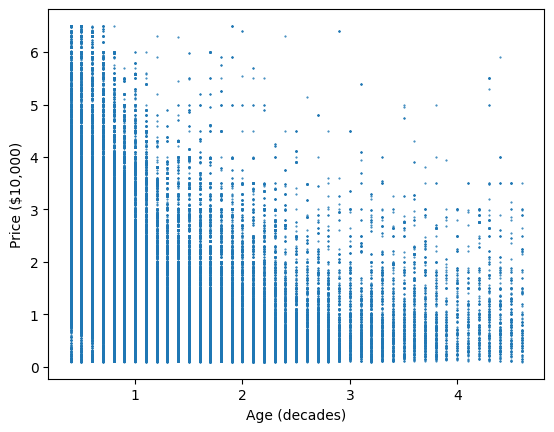

In [15]:

# Pre-process the data: rescale and reshape
X_rescale = X_raw / 10    # rescale to per decade
y_rescale = y_raw / 1e4  # rescale to per $10,000
### START CODE HERE ### (≈ 2 line of code)
X_reshape = X_rescale.reshape(-1, 1)
y_reshape = y_rescale.reshape(-1, 1)
### END CODE HERE ###
print(f"fisrt 5 processed samples: \n{X_reshape[:5]} \n\n{y_reshape[:5]}")

# Visualize the processed data
plt.xlabel("Age (decades)")
plt.ylabel("Price ($10,000)")
plt.plot(X_reshape, y_reshape, '.', markersize=1)


To visualize the processed 

**Expected Output**:
>
```console
fisrt 5 processed samples: 
[[1.3]
 [0.6]
 [0.5]
 [0.4]
 [0.9]] 

[[0.35  ]
 [2.6   ]
 [2.4971]
 [3.999 ]
 [0.8495]]
```

## 2 - Create a Linear Model
Create a linear model: $\hat{y} = w\vec{x} + b$ governed by the weight parameter, $w$ and bias parameter, $b$. The input feature (age) is $\vec{x}$, and the predicted output (price) is $\hat{y}$.
#### $\color{violet}{\textbf{(10\%) Exercise 2: Create a Linear Model}}$


In [17]:
def linear(input, weight, bias):
    """
    Linear model function
        Args:
            input: input features to linear model, (2d) numpy array
            weight: weight of linear model, scalar
            bias: bias of linear model, scalar
        Returns:
            output: predicted output from linear model, (2d) numpy array
    """
    ### START CODE HERE ### (≈ 1 line of code)
    output =  weight * input + bias
    ### END CODE HERE ###
    return output

# Sanity check
print(f"The model's output from 4 input values: \n{linear(np.linspace(-0.2, 0.2, 4).reshape(-1, 1), 2, -3)}")

The model's output from 4 input values: 
[[-3.4       ]
 [-3.13333333]
 [-2.86666667]
 [-2.6       ]]


**Expected Output**:
>
```console
The model's output from 4 input values: 
[[-3.4       ]
 [-3.13333333]
 [-2.86666667]
 [-2.6       ]]
```

## 3 - Evaluate the Model
We need a criterion to evaluate the performance of the model. Mean square error function: $\mathcal{L}(\hat{y}, y) = \frac{1}{M}\Sigma_{i=1}^M \frac{1}{2}(\hat{y}_i - y_i)^2$ is usually applied to calculate the averaged error between the model predictions and groundtrue labels. $M$ is the total number of samples, $\hat{y}$ is the model predicted output, $y$ is the label (true value), $i$ is the index of the sample.

#### $\color{violet}{\textbf{(10\%) Exercise 3: Calculate Mean Square Error Loss}}$


Model's MSE loss: 15.530000000000001


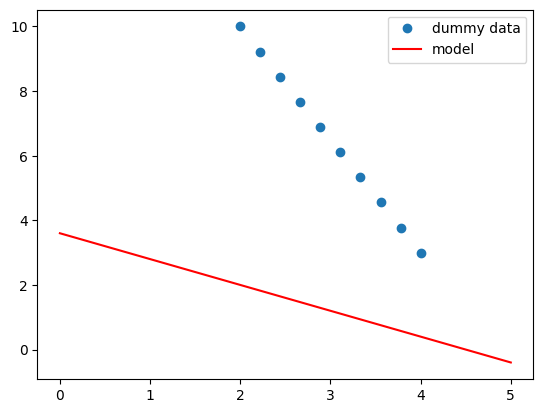

In [28]:
def mse_loss(pred, label):
    """
    Mean square error (MSE) function
        Args:
            pred: model predicted output, (2d) numpy array
            label: true label, (2d) numpy array
        Returns:
            loss_value: averaged MSE error, scalar
    """
    ### START CODE HERE ### (≈ 2 line of code)
    loss_value = np.mean(0.5 * (pred - label) ** 2)
    ### END CODE HERE ###
    return loss_value

# Sanity check
w = -0.8
b = 3.6
X_dummy = np.linspace(2, 4, 10).reshape(-1, 1)  # fake data for sanity check
y_dummy = np.linspace(10, 3, 10).reshape(-1, 1)
# Visualize the model
plt.plot(X_dummy, y_dummy, 'o')
plt.plot([0, 5], linear(np.array([0, 5]).reshape(-1, 1), w, b), 'r')
plt.legend(['dummy data', 'model'])
print(f"Model's MSE loss: {mse_loss(pred=linear(X_dummy, w, b), label=y_dummy)}")

**Expected Output**:
>
```console
Model's MSE loss: 15.530000000000001
```

## 4 - Gradient Descent Optimization
We need to calculate the gradient of the loss function $\mathcal{L}$ (derivatives with respect to $w$ and $b$). The purpose of doing so is to determine directions that increment $w$ and $b$ to reduce the MSE loss of the model. The gradient of the loss function can be computed as:

$\frac{\partial \mathcal{L}}{\partial w} = \frac{1}{M}\Sigma_{i=1}^M(\hat{y}_i - y_i)x_i$

$\frac{\partial \mathcal{L}}{\partial b} = \frac{1}{M}\Sigma_{i=1}^M(\hat{y}_i - y_i)$

To optimize $w$ and $b$, we need to perform gradient descent algorithm:

$\textbf{Initialize } w, b$

$\text{\textbf{Repeat} until converge } \{$

&nbsp; &nbsp; &nbsp; &nbsp; $\text{compute } \frac{\partial \mathcal{L}}{\partial w} \text{, and } \frac{\partial \mathcal{L}}{\partial b}$

&nbsp; &nbsp; &nbsp; &nbsp; $w := w - \alpha \frac{\partial \mathcal{L}}{\partial w}$

&nbsp; &nbsp; &nbsp; &nbsp; $b := b - \alpha \frac{\partial \mathcal{L}}{\partial b}$

$\}$

where $\alpha$ is the learning rate (step size).

#### $\color{violet}{\textbf{(20\%) Exercise 4: Compute Loss Gradient}}$
Please define a function to compute gradient (derivatives): $\frac{\partial \mathcal{L}}{\partial w}$ and $\frac{\partial \mathcal{L}}{\partial b}$


In [29]:
def grad(input, label, pred):
    """
    Compute gradient of loss function
        Args:
            input: input feature to linear model, (2d) numpy array
            label: true label, (2d) numpy array
            pred: model predicted output, (2d) numpy array
        Returns:
            dL_dw: dL/dw, scalar
            dL_db: dL/db, scalar
    """
    ### START CODE HERE ### (≈ 4 lines of code)
    dL_dw = np.mean((pred - label) * input)  # dL/dw
    dL_db = np.mean(pred - label)  # dL/db
    ### END CODE HERE ###

    return dL_dw, dL_db

# Sanity check
dw, db = grad(X_dummy, y_dummy, linear(X_dummy, w, b))
print(f"dL/dw = {dw}, dL/db = {db}")

dL/dw = -14.8, dL/db = -5.300000000000001


#### $\color{violet}{\textbf{(40\%) Exercise 5: Implement Gradient Descent Algorithm}}$
Use a iterative loop to update model parameters: $w$ and $b$.
1. 
2. Bring the averaged MSE loss down below 0.53.


initial w = 3.684559810524488e-05, b = -0.0001387826445218712
loss @ 1 iteration: 2.1660192668556335
loss @ 2 iteration: 2.0203986923604877
loss @ 3 iteration: 1.8941100203105454
loss @ 4 iteration: 1.7844906357817536
loss @ 5 iteration: 1.689245603443134
loss @ 6 iteration: 1.606396885702373
loss @ 7 iteration: 1.5342395746445874
loss @ 8 iteration: 1.4713041690454869
loss @ 9 iteration: 1.4163240615359391
loss @ 10 iteration: 1.3682075163114038
loss @ 11 iteration: 1.3260135171690364
loss @ 12 iteration: 1.2889309513173675
loss @ 13 iteration: 1.256260668234186
loss @ 14 iteration: 1.2274000164817942
loss @ 15 iteration: 1.2018295162334975
loss @ 16 iteration: 1.1791013725349477
loss @ 17 iteration: 1.1588295750649802
loss @ 18 iteration: 1.1406813652746444
loss @ 19 iteration: 1.1243698820473143
loss @ 20 iteration: 1.1096478231070184
loss @ 21 iteration: 1.0963019818837052
loss @ 22 iteration: 1.0841485389206573
loss @ 23 iteration: 1.0730290036095744
loss @ 24 iteration: 1.0628067

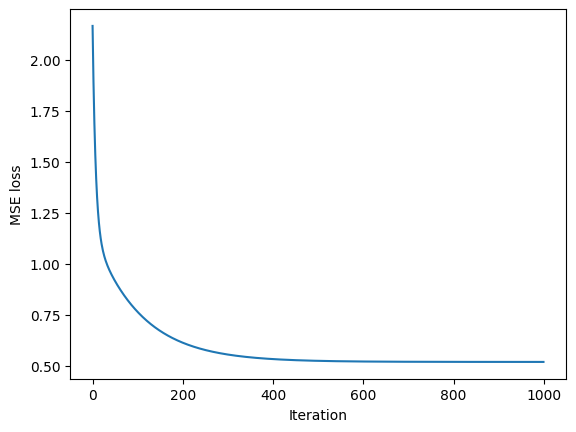

In [30]:
np.random.seed(3321)
# Initialization
X_train = X_reshape
y_train = y_reshape
# Initialize model
w = np.random.normal(loc=0, scale=1e-4)
b = np.random.normal(loc=0, scale=1e-4)
print(f"initial w = {w}, b = {b}")

### START CODE HERE ### (≈ 7 lines of code)
num_iters = 1000
alpha = 0.03  # learning rate
losses = []  # storage for loss at each iteration
for i in range(num_iters):
    preds = linear(X_train, w, b)  # linear model predictions
    dw, db = grad(X_train, y_train, preds)  # loss gradient w.r.t. weight, bias
    w = w - alpha * dw  # update weight
    b = b - alpha * db  # update bias
    loss = mse_loss(preds, y_train)
    print(f"loss @ {i+1} iteration: {loss}")
    # print(f"w = {w}, b = {b}")  # uncomment this line if need to debug
    losses.append(loss)
### END CODE HERE ###
print(f"final w = {w}, b = {b}")

# To visualize changing of the loss
plt.xlabel("Iteration")
plt.ylabel("MSE loss")
plt.plot(losses)

## 5 - Evaluate and Test the Model
Let's first evaluate the model using the training dataset.


Model's MSE loss: 0.5182571898322057


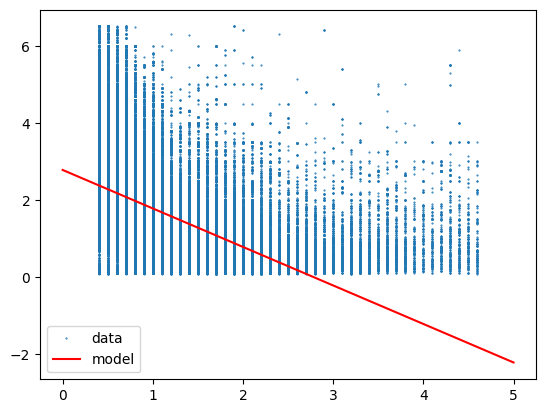

In [31]:
# Visualize the model
plt.plot(X_train, y_train, '.', markersize=1)
plt.plot([0, 5], linear(np.array([0, 5]).reshape(-1, 1), w, b), 'r')
plt.legend(['data', 'model'])
print(f"Model's MSE loss: {mse_loss(pred=linear(X_train, w, b), label=y_train)}")

Now, let's test the model with a new set of data.

#### $\color{violet}{\textbf{(10\%) Exercise 6: Test Model with New Data}}$

In [ ]:
# Load test data
X_test = np.load("ages_test.npy") / 10  # rescale to per decade
y_test = np.load("prices_test.npy") / 1e4  # rescale to per $10,000
print(f"There are {X_test.shape[0]} samples in the test dataset.")

# You'll need to calculate mse loss of the model on the test data
### START CODE HERE ### (≈ 2 lines of code)
pred_test = None
loss_test = None
### END CODE HERE ###
print(f"MSE prediction error on test data: {loss_test}")

# To visualize the model for how it fits to the test data
plt.xlabel("Age (decades)")
plt.ylabel("Price ($10,000)")
plt.plot(X_test, y_test, 'o')
plt.plot([0, 5], forward(w, b, np.array([0, 5])), 'r')

You may observe that the model did somehow catch the relationship between ages and prices of the cars. However, it does not make sense to predict negative price for the cars older than 3 decades. We'll investigate approaches to avoid this in the future.  

# Congratulations! You have finished this assignment!